#Linea de espera

$$G/G/1$$

In [17]:
from random import random
from random import expovariate as expo
from random import triangular
import numpy as np
import pandas as pd

class Contar:
	def __init__(self,cota):
		self.cota = cota
	def c(self,x):
		if x < self.cota:
			return x

def lineaE(n):
	t0 = 0
	s = 0 # total de clientes en la fila
	k = 0 # indice
	datos = np.zeros( (n,7) )
	encabezados = ['cliente','tiempo de interllegada','tiempo de llegada','fila','inicio del servicio','tiempo de servicio','fin del servicio']
	for i in range(n):
		# numero de cliente
		datos[i][0] = i + 1

		# tiempo entre llegadas
		t = expo(1/4) # distribucion de llegadas
		datos[i][1] = t

		# tiempo de llegada
		if i == 0:
			t0 = t
			datos[i][2] = t0
		else:
			t0 += t
			datos[i][2] = t0

		# fila
		if i == 0:
			datos[i][3] = s
		elif t0 < datos[k][6]:
			s += 1
			datos[i][3] = s
		elif t0 > datos[k][6]:
			w = len( list( filter( Contar( datos[i][2] ).c , datos[k:i,6] )))
			s = len( datos[k:i,6] ) - w
			k = w # se actualiza el indice
			datos[i][3] = s

		# inicio del servicio
		if i==0:
			datos[i][4] = t
		else:
			datos[i][4] = max( datos[i-1][6] , t0 )

		# distribucion del tiempo de servicio
		u = (6-1)*random()+1
		datos[i][5] = u

		# fin del servicio
		datos[i][6] = datos[i][4] + u

		#
	return pd.DataFrame( np.round(datos,2) , columns = encabezados,dtype=float).astype({'cliente':np.int32,
'tiempo de interllegada':np.float32,
'tiempo de llegada':np.float32,
'fila':np.int32,
'inicio del servicio':np.float32,
'tiempo de servicio':np.float32,
'fin del servicio':np.float32}).style.hide( axis = "index" ).format( precision = 2 )

simu = lineaE(60)
simu

cliente,tiempo de interllegada,tiempo de llegada,fila,inicio del servicio,tiempo de servicio,fin del servicio
1,12.44,12.44,0,12.44,2.72,15.16
2,1.17,13.61,1,15.16,5.89,21.05
3,2.17,15.78,1,21.05,1.33,22.37
4,2.07,17.85,2,22.37,4.92,27.29
5,0.77,18.62,3,27.29,2.63,29.92
6,0.63,19.25,4,29.92,4.82,34.75
7,3.93,23.17,3,34.75,4.36,39.11
8,2.41,25.58,4,39.11,5.09,44.20
9,1.82,27.40,4,44.20,1.16,45.36
10,8.89,36.28,3,45.36,3.86,49.22


In [ ]:
from random import random
from random import expovariate as expo
import numpy as np
import pandas as pd

def linea(n):
	t0 = 0
	s = 0 # total de clientes en la fila
	k = 0 # indice
	datos = np.zeros( (n,7) )
	for i in range(n):
		# numero de cliente
		datos[i][0] = i + 1

		# tiempo entre llegadas
		t = expo(1/3) # distribucion de llegadas
		datos[i][1] = t

		# tiempo de llegada
		if i == 0:
			t0 = t
			datos[i][2] = t0
		else:
			t0 += t
			datos[i][2] = t0

		# fila
		if i == 0:
			datos[i][3] = s
		else:
			if t0 < datos[k][6]:
				s += 1
				datos[i][3] = s
			elif t0 > datos[k][6]:

				k = i
				s = 0
				datos[i][3] = s

		# inicio del servicio
		if i==0:
			datos[i][4] = t
		else:
			datos[i][4] = max( datos[i-1][6] , t0 )

		# distribucion del tiempo de servicio
		u = (7-1)*random()+1
		datos[i][5] = u

		# fin del servicio
		datos[i][6] = datos[i][4] + u

		#
	encabezados = ['cliente','tiempo de interllegada','tiempo de llegada','fila','inicio del servicio','tiempo de servicio','fin del servicio']
	return np.round(datos,2)
simu = linea(20)
print(simu[:,4])

[ 0.59  7.3   9.64 15.53 20.96 22.18 27.53 28.6  32.23 37.52 39.34 42.07
 48.51 54.31 59.25 66.19 69.85 73.97 78.35 84.91]


In [ ]:
k = 6000
simu2 = lineaE(k)
print("Tiempo promedio en el sistema: ",simu2['tiempo promedio en el sistema'].mean())
print("Clientes promedio en el sistema: ",simu2['clientes en fila'].mean())
print("Probabilidad de cero clientes en el sistema:",list( simu2["clientes en fila"] ).count(0)/k)

Tiempo promedio en el sistema:  17.673378333333336
Clientes promedio en el sistema:  1.0901666666666667
Probabilidad de cero clientes en el sistema: 0.4728333333333333


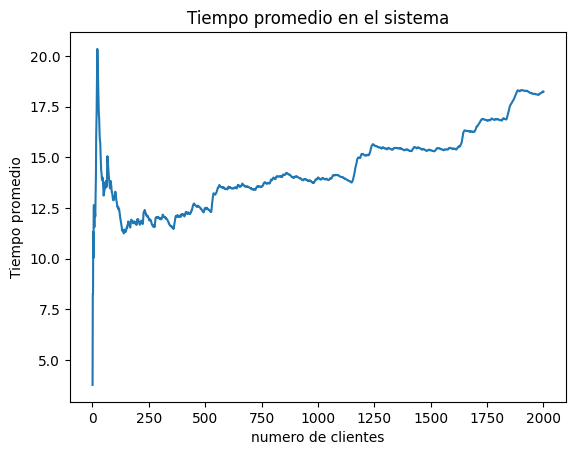

In [ ]:
import matplotlib.pyplot as plt
n = 2000
replica1 = lineaE(n)
plt.plot(replica1["No. de cliente"],replica1["tiempo promedio en el sistema"])
plt.title("Tiempo promedio en el sistema")
plt.xlabel("numero de clientes")
plt.ylabel("Tiempo promedio")
plt.show()

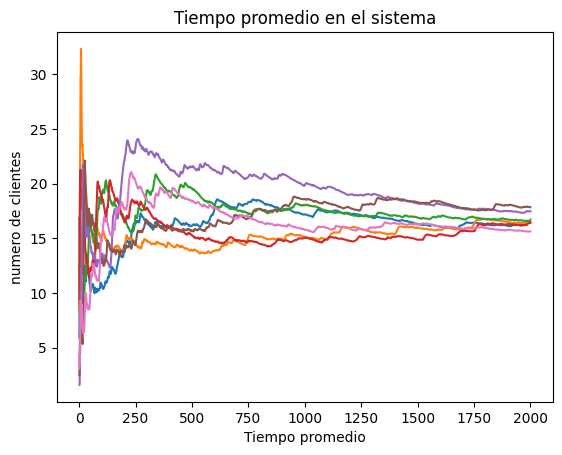

In [ ]:
import matplotlib.pyplot as plt
n = 2000

for i in range(7):
  replicas = lineaE(n)
  plt.plot(replicas["No. de cliente"],replicas["tiempo promedio en el sistema"])
plt.title("Tiempo promedio en el sistema")
plt.xlabel("Tiempo promedio")
plt.ylabel("numero de clientes")
plt.show()

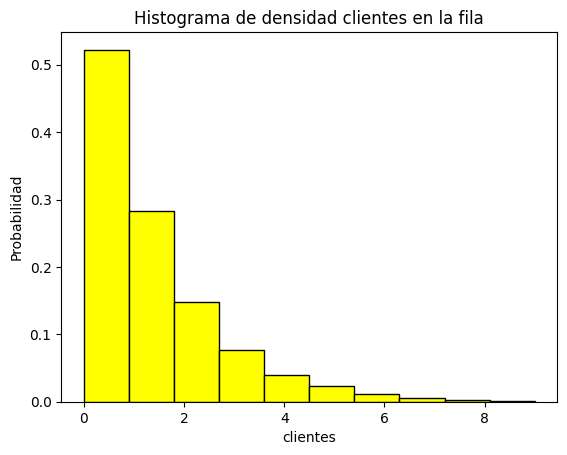

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(lineaE(8000)['clientes en fila'],color='yellow',density=True,edgecolor='black')
plt.title("Histograma de densidad clientes en la fila")
plt.xlabel("clientes")
plt.ylabel("Probabilidad")

plt.show()